In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

It is highly recommended to read the documentation before implementing any alogorithm.

LINEAR REGRESSION : 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
LOGISTIC REGRESSION :
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
SVM REGRESSOR :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html<br>
SVM CLASSIFIER :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>
DECISION TREE CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
DECISION TREE Regressor :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br>

METRICS:
R2_SCORE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html<br>
MSE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html<br>
MAE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html<br>
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>

WRITE THE CODE FOR IMPORTING THE DATA

In [42]:
# WRITE CODE HERE IMPORT THE DATA AS 'data'
data = pd.read_csv('WEEK4.csv')

In [43]:
data.head()

,price,year,mileage,color,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,...,black,blue,gray,no_color,silver,white,Goa,MP,Maharashtra,UP
0,2899,2011,190552.0,silver,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,5350,2018,39590.0,silver,2,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,25000,2014,64146.0,blue,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,27700,2018,6654.0,red,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5700,2018,45561.0,white,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


ONE HOT ENCODING THE COLOR COLUMN AND THEN DROPPING THE COLOR COLUMN

In [44]:
# ONE HOT ENCODING THE COLOR COLUMN
data = pd.concat([data, pd.get_dummies(data['color']).drop('white', axis=1)], axis=1)
data = data.drop('color', axis=1)

In [45]:
# VIEWING THE DATA ONCE
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,2899,2011,190552.0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,5350,2018,39590.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,25000,2014,64146.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,27700,2018,6654.0,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,5700,2018,45561.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


WE USE THE train_test_split_function TO SPLIT THE DATA INTO TRAIN AND TEST <br>
HERE WE IMPORT IT FROM SKLEARN

In [46]:
from sklearn.model_selection import train_test_split as tts

LET US LOOK AT THE PRICES DISTRIBUTION

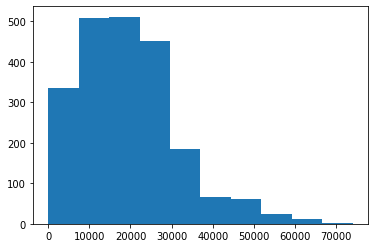

In [47]:
plt.hist(data['price']);

IT IS LEFT-SKEWED, WE HAVE LEARNT HOW TO HANDLE SKEWED DATA<br>
We will either use log transform or sqrt transform

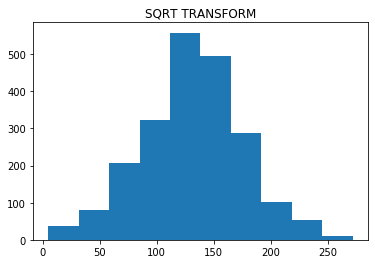

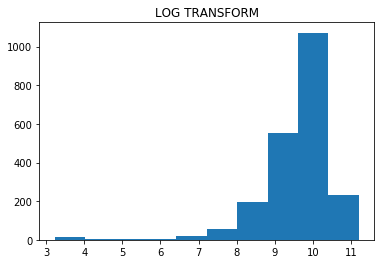

In [48]:
# WE HAVE WRITTEN THE CODE FOR PLOTTING THE HISTOGRAM FOR THE LOG-TRANSFORMED PRICE COLUMN AND SQRT TRANSFORMED SQRT COLUMN.
plt.hist(np.sqrt(data['price']));
plt.title('SQRT TRANSFORM');
plt.show()
plt.hist(np.log(data['price']));
plt.title('LOG TRANSFORM');
plt.show()

CLEARLY SQRT TRANSFORM IS BETTER

In [49]:
# WE CONVERT PRICES TO THEIR SQRT AND ROUND OFF DECIMALS TO TWO
data['price'] = round(np.sqrt(data['price']), 2)

In [50]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = tts(data.drop('price', axis=1), data['price'], test_size=0.2, random_state=1)

In [51]:
# LET US PRINT THE SHAPES
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('\nExpected shapes')
print((1722, 25))
print((431, 25))
print((1722,))
print((431,))
print('\nVerify if they are matching')

(1722, 25)
(431, 25)
(1722,)
(431,)

Expected shapes
(1722, 25)
(431, 25)
(1722,)
(431,)

Verify if they are matching


NOW <br>
LET US APPLY LINEAR REGRESSION ON THE DATA, THIS TIME WE WILL IMPORT IT FROM SKLEARN <br>


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [53]:
# INITIALIZE LINEAR REGRESSION WITH ALL DEFAULT PARAMETERS
Linreg = LinearRegression()
Linreg.fit(X_train, y_train)

# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT 
print("Linear Regression Training R2 score is " + str(r2_score(np.square(y_train), np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing R2 score is " + str(r2_score(np.square(y_test), np.square(Linreg.predict(X_test)))))

# WRITE CODE FOR MEAN SQUARE ERROR AND MEAN

# Start code
print('Linear Regression Training MSE:', mean_squared_error(np.square(y_train), np.square(Linreg.predict(X_train))))
print('Linear Regression Testing MSE:', mean_squared_error(np.square(y_test), np.square(Linreg.predict(X_test))))
print('Linear Regression Training MAE:', mean_absolute_error(np.square(y_train), np.square(Linreg.predict(X_train))))
print('Linear Regression Testing MAE:', mean_absolute_error(np.square(y_test), np.square(Linreg.predict(X_test))))


# End code

print("\n")
print("The correct values are :")


print('Linear Regression Training R2 score is 0.3577935806672855')
print('Linear Regression Testing R2 score is 0.33405970134102436')
print('Linear Regression Training mean_square_error is 90997459.24038002')
print('Linear Regression Testing mean_square_error is 93998879.06677869')
print('Linear Regression Training mean_absolute_error is 6864.980505017769')
print('Linear Regression Testing mean_absolute_error is 6926.987292556893')

print("\nPlease verify if you have got the same values")

Linear Regression Training R2 score is 0.3577935806672947
Linear Regression Testing R2 score is 0.3340597013410348
Linear Regression Training MSE: 90997459.24037871
Linear Regression Testing MSE: 93998879.06677723
Linear Regression Training MAE: 6864.98050501778
Linear Regression Testing MAE: 6926.987292556907


The correct values are :
Linear Regression Training R2 score is 0.3577935806672855
Linear Regression Testing R2 score is 0.33405970134102436
Linear Regression Training mean_square_error is 90997459.24038002
Linear Regression Testing mean_square_error is 93998879.06677869
Linear Regression Training mean_absolute_error is 6864.980505017769
Linear Regression Testing mean_absolute_error is 6926.987292556893

Please verify if you have got the same values


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF DECISION TREE IN REGRESSION <br>

In [54]:
from sklearn.tree import DecisionTreeRegressor

# INITIALIZE THE DECISION TREE WITH criterion as mse, max depth as 7 and Random State as 1
# USE THE FIT METHOD TO FIND THE R2_SCORE, MSE, MAE For training as well as testing data


# START CODE
model = DecisionTreeRegressor(criterion='mse', max_depth=7, random_state=1)
model.fit(X_train, y_train)

p_train = model.predict(X_train)
p_test = model.predict(X_test)
print('DTRegression Training R2 Score:', r2_score(np.square(y_train), np.square(p_train)))
print('DTRegression Testing R2 Score:', r2_score(np.square(y_test), np.square(p_test)))
print('DTRegression Training MSE:', mean_squared_error(np.square(y_train), np.square(p_train)))
print('DTRegression Testing MSE:', mean_squared_error(np.square(y_test), np.square(p_test)))
print('DTRegression Training MAE:', mean_absolute_error(np.square(y_train), np.square(p_train)))
print('DTRegression Testing MAE:', mean_absolute_error(np.square(y_test), np.square(p_test)))

# END CODE

DTRegression Training R2 Score: 0.422869230755335
DTRegression Testing R2 Score: 0.36145560633416207
DTRegression Training MSE: 81776562.90835412
DTRegression Testing MSE: 90131889.2396716
DTRegression Training MAE: 6266.244817595775
DTRegression Testing MAE: 6846.025816839579


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF SVM IN REGRESSION <br>

In [55]:
from sklearn.svm import SVR
# INITIALIZE THE SVM WITH kernel as 'poly', maximum number of iterations as 3000, degree as 2, C(regularization parameter) as 0.1 
# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

# START CODE
model = SVR(kernel='poly', max_iter=3000, degree=2, C=0.1)
model.fit(X_train, y_train)

p_train = model.predict(X_train)
p_test = model.predict(X_test)
print('SVR Training R2 Score:', r2_score(np.square(y_train), np.square(p_train)))
print('SVR Testing R2 Score:', r2_score(np.square(y_test), np.square(p_test)))
print('SVR Training MSE:', mean_squared_error(np.square(y_train), np.square(p_train)))
print('SVR Testing MSE:', mean_squared_error(np.square(y_test), np.square(p_test)))
print('SVR Training MAE:', mean_absolute_error(np.square(y_train), np.square(p_train)))
print('SVR Testing MAE:', mean_absolute_error(np.square(y_test), np.square(p_test)))

# END CODE

SVR Training R2 Score: -21.378337117720697
SVR Testing R2 Score: 0.0879391173112708
SVR Training MSE: 3170899197.5713468
SVR Testing MSE: 128739319.10418974
SVR Training MAE: 9831.444528754593
SVR Testing MAE: 8348.703212635415


YOU MIGHT SEE WORSE VALUES WHEN COMPARED TO LINEAR REGRESSION OR DECISION TREE AS THE DATA IS UNSCALED AND SVM REQUIRES MUCH MORE PREPROCESSING AND TUNING...BUT WE WON'T DO THAT HERE AS OUR AIM WAS JUST TO IMPLEMENT THE MODELS

<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF Random Forest IN REGRESSION <br>

In [56]:
from sklearn.ensemble import RandomForestRegressor
# INITIALIZE THE Random Forest Regressor WITH no: of trees as 200, max_depth as 9, n_jobs as -1(read documentation for more details) and random state as 1 

# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

# START CODE
model = RandomForestRegressor(n_estimators=200, max_depth=9, n_jobs=-1, random_state=1)
model.fit(X_train, y_train)

p_train = model.predict(X_train)
p_test = model.predict(X_test)
print('RandomForestRegressor Training R2 Score:', r2_score(np.square(y_train), np.square(p_train)))
print('RandomForestRegressor Testing R2 Score:', r2_score(np.square(y_test), np.square(p_test)))
print('RandomForestRegressor Training MSE:', mean_squared_error(np.square(y_train), np.square(p_train)))
print('RandomForestRegressor Testing MSE:', mean_squared_error(np.square(y_test), np.square(p_test)))
print('RandomForestRegressor Training MAE:', mean_absolute_error(np.square(y_train), np.square(p_train)))
print('RandomForestRegressor Testing MAE:', mean_absolute_error(np.square(y_test), np.square(p_test)))

# END CODE

RandomForestRegressor Training R2 Score: 0.5524364393379151
RandomForestRegressor Testing R2 Score: 0.3997413290406362
RandomForestRegressor Training MSE: 63417533.12143005
RandomForestRegressor Testing MSE: 84727778.65210524
RandomForestRegressor Training MAE: 5528.669046457424
RandomForestRegressor Testing MAE: 6695.668840563839


NOW FOR CLASSIFICATION MODELS WE NEED TO CONVERT THE TARGET VARIABLE INTO DIFFERENT CLASSES

In [57]:
# WE FIND THE MEDIAN
np.square(data['price']).describe()

count     2153.000000
mean     19298.257905
std      11904.254199
min         25.000000
25%      10799.366400
50%      17300.140900
75%      26001.562500
max      74000.320900
Name: price, dtype: float64

WE WILL DO BINARY CLASSIFICATION AND DIVIDE THE DATA EQUALLY(ALMOST) INTO 1's AND 0's <br>
WE HAVE CHOSEN THRESHOLD AT price = 20000

In [58]:
data.loc[np.square(data['price']) < 20000, 'price'] = 0
data.loc[np.square(data['price']) >= 20000, 'price'] = 1


In [59]:
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,0.0,2011,190552.0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.0,2018,39590.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.0,2014,64146.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1.0,2018,6654.0,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.0,2018,45561.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [60]:
data.describe()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
count,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,...,2153.000000,2153.000000,2153.00000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000
mean,0.416628,2017.070135,48829.217836,2.432420,0.122620,0.180678,0.018579,0.010218,0.138412,0.044124,...,0.191825,0.210404,0.19647,0.212726,0.222945,0.061310,0.165815,0.026010,0.081282,0.130516
std,0.493115,2.859018,47495.898243,1.102215,0.328076,0.384841,0.135063,0.100591,0.345412,0.205419,...,0.393828,0.407690,0.39742,0.409331,0.416318,0.239953,0.372001,0.159203,0.273331,0.336948
min,0.000000,1973.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2016.000000,21034.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2018.000000,34922.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2019.000000,59798.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2020.000000,999999.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
X_train, X_test, y_train, y_test = tts(data.drop('price', axis=1), data['price'], test_size=0.2, random_state=1)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [70]:
# INITIALIZE Logistic Regression BY TAKING solver as 'lbfgs', max_iter as 2000, C as 0.5 and penalty as 'l2' and random_state as 1 
# FIT Logistic Regression ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR LOGISTIC REGRESSION
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
model = LogisticRegression(solver='lbfgs', max_iter=2000, C=0.5, penalty='l2', random_state=1)
model.fit(X_train, y_train)

p_train = model.predict(X_train)
p_test = model.predict(X_test)

matrix = confusion_matrix(y_train, p_train)
print('TPR/Sensitivity/Recall:', matrix[1, 1] / (matrix[1, 1] + matrix[1, 0]))
print('FPR:', matrix[0, 1] / (matrix[0, 1] + matrix[0, 0]))
print('Specificity:', matrix[0, 0] / (matrix[0, 1] + matrix[0, 0]))
print('Accuracy:', (matrix[0, 0] + matrix[1, 1]) / (matrix[0, 0] + matrix[0, 1] + matrix[1, 0] + matrix[1, 1]))
print()
matrix = confusion_matrix(y_test, p_test)
print('TPR/Sensitivity/Recall:', matrix[1, 1] / (matrix[1, 1] + matrix[1, 0]))
print('FPR:', matrix[0, 1] / (matrix[0, 1] + matrix[0, 0]))
print('Specificity:', matrix[0, 0] / (matrix[0, 1] + matrix[0, 0]))
print('Accuracy:', (matrix[0, 0] + matrix[1, 1]) / (matrix[0, 0] + matrix[0, 1] + matrix[1, 0] + matrix[1, 1]))
# END CODE

TPR/Sensitivity/Recall: 0.6502115655853314
FPR: 0.228035538005923
Specificity: 0.771964461994077
Accuracy: 0.721835075493612

TPR/Sensitivity/Recall: 0.6542553191489362
FPR: 0.22633744855967078
Specificity: 0.7736625514403292
Accuracy: 0.7215777262180975


In [71]:
# INITIALIZE SVM BY TAKING kernal as 'rbf', max_iter as 1000 and random_state as 1 and gamma as scale
# FIT SVM ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR SVM
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
model = SVC(kernel='rbf', max_iter=1000, gamma='scale', random_state=1)
model.fit(X_train, y_train)

p_train = model.predict(X_train)
p_test = model.predict(X_test)
matrix = confusion_matrix(y_train, p_train)
print('TPR/Sensitivity/Recall:', matrix[1, 1] / (matrix[1, 1] + matrix[1, 0]))
print('FPR:', matrix[0, 1] / (matrix[0, 1] + matrix[0, 0]))
print('Specificity:', matrix[0, 0] / (matrix[0, 1] + matrix[0, 0]))
print('Accuracy:', (matrix[0, 0] + matrix[1, 1]) / (matrix[0, 0] + matrix[0, 1] + matrix[1, 0] + matrix[1, 1]))
print()
matrix = confusion_matrix(y_test, p_test)
print('TPR/Sensitivity/Recall:', matrix[1, 1] / (matrix[1, 1] + matrix[1, 0]))
print('FPR:', matrix[0, 1] / (matrix[0, 1] + matrix[0, 0]))
print('Specificity:', matrix[0, 0] / (matrix[0, 1] + matrix[0, 0]))
print('Accuracy:', (matrix[0, 0] + matrix[1, 1]) / (matrix[0, 0] + matrix[0, 1] + matrix[1, 0] + matrix[1, 1]))

# END CODE


TPR/Sensitivity/Recall: 0.5063469675599436
FPR: 0.14906219151036526
Specificity: 0.8509378084896347
Accuracy: 0.7090592334494773

TPR/Sensitivity/Recall: 0.5372340425531915
FPR: 0.13991769547325103
Specificity: 0.8600823045267489
Accuracy: 0.7192575406032483


In [72]:
# INITIALIZE DECISION TREE CLASSIFIER BY TAKING criterion as 'gini' , max_depth as 3, and random_state as 1
# FIT Decision Tree ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Decision Tree
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
model = DecisionTreeClassifier(max_depth=3, random_state=1)
model.fit(X_train, y_train)

p_train = model.predict(X_train)
p_test = model.predict(X_test)
matrix = confusion_matrix(y_train, p_train)
print('TPR/Sensitivity/Recall:', matrix[1, 1] / (matrix[1, 1] + matrix[1, 0]))
print('FPR:', matrix[0, 1] / (matrix[0, 1] + matrix[0, 0]))
print('Specificity:', matrix[0, 0] / (matrix[0, 1] + matrix[0, 0]))
print('Accuracy:', (matrix[0, 0] + matrix[1, 1]) / (matrix[0, 0] + matrix[0, 1] + matrix[1, 0] + matrix[1, 1]))
print()
matrix = confusion_matrix(y_test, p_test)
print('TPR/Sensitivity/Recall:', matrix[1, 1] / (matrix[1, 1] + matrix[1, 0]))
print('FPR:', matrix[0, 1] / (matrix[0, 1] + matrix[0, 0]))
print('Specificity:', matrix[0, 0] / (matrix[0, 1] + matrix[0, 0]))
print('Accuracy:', (matrix[0, 0] + matrix[1, 1]) / (matrix[0, 0] + matrix[0, 1] + matrix[1, 0] + matrix[1, 1]))

# END CODE

TPR/Sensitivity/Recall: 0.5430183356840621
FPR: 0.12240868706811452
Specificity: 0.8775913129318855
Accuracy: 0.7398373983739838

TPR/Sensitivity/Recall: 0.5638297872340425
FPR: 0.11522633744855967
Specificity: 0.8847736625514403
Accuracy: 0.7447795823665894


In [73]:
# INITIALIZE RANDOM FOREST CLASSIFIER BY TAKING no:of trees as 100 , max_depth as 3,criterion as 'gini' and random_state as 1 
# FIT RANDOM FOREST ON TRAINING DATA
# WRITE CODE HERE AND FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Random Forest
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
model.fit(X_train, y_train)

p_train = model.predict(X_train)
p_test = model.predict(X_test)
matrix = confusion_matrix(y_train, p_train)
print('TPR/Sensitivity/Recall:', matrix[1, 1] / (matrix[1, 1] + matrix[1, 0]))
print('FPR:', matrix[0, 1] / (matrix[0, 1] + matrix[0, 0]))
print('Specificity:', matrix[0, 0] / (matrix[0, 1] + matrix[0, 0]))
print('Accuracy:', (matrix[0, 0] + matrix[1, 1]) / (matrix[0, 0] + matrix[0, 1] + matrix[1, 0] + matrix[1, 1]))
print()
matrix = confusion_matrix(y_test, p_test)
print('TPR/Sensitivity/Recall:', matrix[1, 1] / (matrix[1, 1] + matrix[1, 0]))
print('FPR:', matrix[0, 1] / (matrix[0, 1] + matrix[0, 0]))
print('Specificity:', matrix[0, 0] / (matrix[0, 1] + matrix[0, 0]))
print('Accuracy:', (matrix[0, 0] + matrix[1, 1]) / (matrix[0, 0] + matrix[0, 1] + matrix[1, 0] + matrix[1, 1]))
# END CODE

TPR/Sensitivity/Recall: 0.5444287729196051
FPR: 0.12043435340572557
Specificity: 0.8795656465942744
Accuracy: 0.7415795586527294

TPR/Sensitivity/Recall: 0.5638297872340425
FPR: 0.11934156378600823
Specificity: 0.8806584362139918
Accuracy: 0.7424593967517401
